In [1]:
# drive mount to get target image and compiled model.h5 file
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow.compat.v1 as tf
import keras

# get model from dir
from keras.models import load_model
model = load_model('/content/drive/My Drive/Colab Notebooks/2019.10.09 Digit Recognition/DigitRecognitionCNN.h5')

Using TensorFlow backend.







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [0]:
# # check version
# print('Python version : ', sys.version)
# print('TensorFlow version : ', tf.__version__)
# print('Keras version : ', keras.__version__)

# # show model info
# model.summary()

Target image dir: /content/drive/My Drive/Colab Notebooks/2019.10.09 Digit Recognition/target images/9-1.png


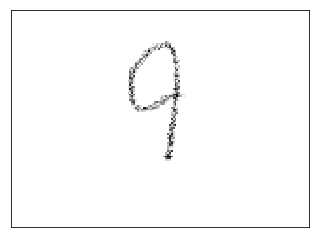

Result of Prediction: [9]


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy

# image size
img_rows = 28
img_cols = 28

# get image file dir
# target = '/content/drive/My Drive/Colab Notebooks/2019.10.09 Digit Recognition/target.png'
target = '/content/drive/My Drive/Colab Notebooks/2019.10.09 Digit Recognition/target images/'
target = target + str(input("Target image dir: " + target))


# read image, resize and reverse
img = cv2.imread(target, cv2.IMREAD_GRAYSCALE)
if(type(img) != numpy.ndarray):
  raise OSError('File \"' + target + '\" not found')
img_result = cv2.resize(img, dsize=(28, 28), interpolation=cv2.INTER_AREA)
img_result = cv2.bitwise_not(img_result)

# reshape data
img_result.reshape(1, img_rows, img_cols, 1)
# img_result.reshape(img_result.shape[0], img_rows, img_cols, 1)

# change type to floating point
img_result = img_result.astype('float32') / 255.

# show image
plt.imshow(cv2.bitwise_not(img), cmap='Greys', interpolation='nearest')
# plt.imshow(img_result.reshape(28, 28), cmap='Greys', interpolation='nearest')
plt.xticks([]) # hide x axis
plt.yticks([]) # hide y axis
plt.show()

print('Result of Prediction:', model.predict_classes(img_result.reshape(1, img_rows, img_cols, 1)))